In [1]:
import numpy as np
import pandas as pd

In [2]:
customer_churn =  pd.read_csv('customer_churn.csv')
#Quickly testing of dataset
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Statistical Analysis
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df_corr = customer_churn.corr().round(2)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

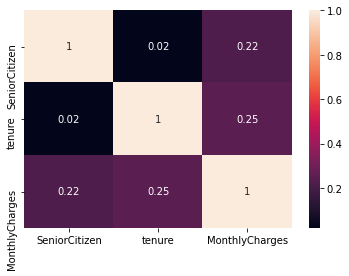

In [6]:
sns.heatmap(df_corr, annot=True)

In [7]:
customer_churn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

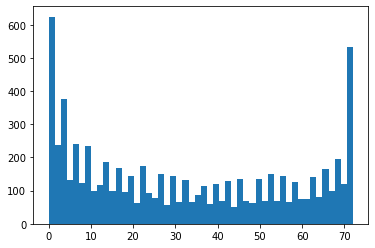

In [8]:
plt.hist(customer_churn['tenure'], bins=50)
plt.show()

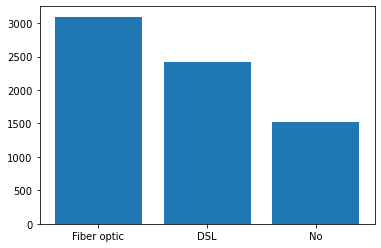

In [9]:
x = customer_churn['InternetService'].value_counts().keys().tolist()
y = customer_churn['InternetService'].value_counts().tolist()
plt.bar(x, y)
plt.show()

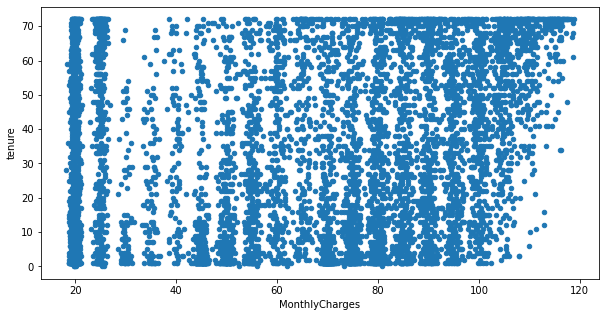

In [10]:
customer_churn.plot(kind='scatter', x= 'MonthlyCharges', y='tenure', figsize=(10,5))
plt.show()

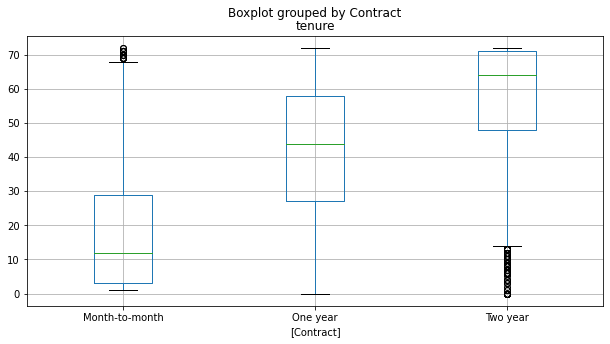

In [11]:
customer_churn.boxplot(column='tenure', by=['Contract'], figsize=(10,5))
plt.show()

## Implement Logistic Regression for Classification CHURNING 
***
This model basically predict customer churn or not based on tenure and monthly charges provided by customer.
***

## Prepararing data Set

In [12]:
X = customer_churn[['tenure','MonthlyCharges']]
y = customer_churn['Churn']
X.shape, y.shape

((7043, 2), (7043,))

## Training and testing data splitting

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 2), (2113, 2), (4930,), (2113,))

## Model Building

In [14]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

## fit the model

In [15]:
model2.fit(X_train, y_train)
model2.intercept_.round(2)
model2.coef_.round(2)

array([[-0.05,  0.03]])

## Predict the values

In [22]:
y_pred = model2.predict(X_test)

## Evaluation Matrics

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print("Accuracy Score is:", accuracy_score(y_test, y_pred))
print("classification_report is ",classification_report(y_test, y_pred))

Accuracy Score is: 0.7813535257927118
classification_report is                precision    recall  f1-score   support

          No       0.81      0.91      0.86      1544
         Yes       0.64      0.44      0.52       569

    accuracy                           0.78      2113
   macro avg       0.73      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



## K-fold cross Validation

In [27]:
from sklearn.model_selection import KFold
X = customer_churn[['tenure','MonthlyCharges']].values
y = customer_churn['Churn'].values
kf = KFold(n_splits=5, shuffle=True)
splits = list(kf.split(X))
train_indices, test_indices = splits[0]
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((5634, 2), (1409, 2), (5634,), (1409,))

In [28]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.7849538679914834

In [29]:
scores=[]
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model4 = LogisticRegression()
    model4.fit(X_train, y_train)
    scores.append(model4.score(X_test, y_test))
print(scores)

[0.7636621717530163, 0.7913413768630234, 0.7984386089425124, 0.7883522727272727, 0.7855113636363636]


In [33]:
print("Minimum Score", np.min(scores))
print("Maximum Score", np.max(scores))
print("Average Score", np.mean(scores))

Minimum Score 0.7636621717530163
Maximum Score 0.7984386089425124
Average Score 0.7854611587844377



## Pickle the model

In [34]:
import pickle
#Saving model to pickle
pickle.dump(model3, open('model.pkl','wb'))

In [37]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model3.predict([[4, 52]]))

['No']
